In [1]:
# загружаем библиотеки
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
# убираем предупреждения
import warnings
warnings.filterwarnings('ignore')

In [2]:
# фиксируемся
RANDOM_STATE = 42

In [3]:
# создаем датафрейм для ответов
results = pd.DataFrame(columns = ['model', 'task', 'accuracy'])

https://archive.ics.uci.edu/ml/datasets/wine+quality

In [4]:
# загружаем датасет
data = pd.read_csv('winequality-red.csv', sep = ';')
data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


### 1.Разделите выборку на обучающую и тестовую в отношении 70%/30%, предварительно выделив целевую переменную (колонка 'quality').

In [5]:
### Ваш код ###

https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html

In [6]:
# загружаем инструмент
from sklearn.model_selection import train_test_split

In [7]:
# Выделяем feature и target
X = data.drop(['quality'], axis=1) # feature
y = data['quality'] # target

In [8]:
%%time
# разделяем выборку
X_train, X_test, y_train, y_test= train_test_split(X, y, test_size = 0.3, random_state = RANDOM_STATE)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

CPU times: total: 0 ns
Wall time: 3 ms


((1119, 11), (480, 11), (1119,), (480,))

### 2.Оцените качество на тестовой выборке по метрике accuracy для классификаторов:

DecisionTreeClassifier

BaggingClassifier со 100 деревьями

RandomForestClassifier со 100 деревьями

Сравните результаты и напишите какой вывод можно сделать.

In [9]:
### Ваш код ###
acc_DT = 0
acc_Bagging = 0
acc_RF = 0

https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html

https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.BaggingClassifier.html

https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html

https://scikit-learn.org/stable/modules/generated/sklearn.metrics.accuracy_score.html

In [10]:
# загружаем модели и оценки
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier
from sklearn.metrics import accuracy_score

In [11]:
%%time
# посчитаем accuracy классификатора DecisionTreeClassifier
DT = DecisionTreeClassifier(random_state = RANDOM_STATE).fit(X_train, y_train)
y_pred = DT.predict(X_test)
acc_DT = accuracy_score(y_test, y_pred)
print('Accuracy:', acc_DT)

Accuracy: 0.5729166666666666
CPU times: total: 0 ns
Wall time: 12 ms


In [12]:
%%time
# посчитаем accuracy классификатора BaggingClassifier
Bagging = BaggingClassifier(n_estimators=100, random_state = RANDOM_STATE).fit(X_train, y_train)
y_pred = Bagging.predict(X_test)
acc_Bagging = accuracy_score(y_test, y_pred)
print('Accuracy:', acc_Bagging)

Accuracy: 0.6416666666666667
CPU times: total: 672 ms
Wall time: 672 ms


In [13]:
%%time
# посчитаем accuracy классификатора RandomForestClassifier
RF = RandomForestClassifier(n_estimators=100, random_state = RANDOM_STATE).fit(X_train, y_train)
y_pred = RF.predict(X_test)
acc_RF = accuracy_score(y_test, y_pred)
print('Accuracy:', acc_RF)

Accuracy: 0.6541666666666667
CPU times: total: 297 ms
Wall time: 304 ms


In [14]:
# Вывод: Результат по метрике accuracy и скорость обучения у RandomForestClassifier лучше, чем у остальных классификаторов

In [15]:
# фиксируем ответы
results.loc[0] = ['DecisionTreeClassifier', 'task2', acc_DT]
results.loc[1] = ['BaggingClassifier ', 'task2', acc_Bagging]
results.loc[2] = ['RandomForestClassifier', 'task2', acc_RF]

### 3.Посчитайте качество на тестовой выборке по метрике accuracy для классификатора RandomForestClassifier, используя значения деревьев:
    
10, 50, 100, 200, далее с шагом 200 до 5000 деревьев.
Постройте график зависимости качества от числа деревьев.



In [16]:
### Ваш код ###

In [17]:
%%time
# считаем качество на тестовой выборке по метрике accuracy для классификатора RandomForestClassifier
N = [10, 50, 100] + [n for n in range(200, 5001, 200)]
acc_scores = []
for n in N:
    RF = RandomForestClassifier(n_estimators=n, random_state = RANDOM_STATE).fit(X_train, y_train)
    y_pred = RF.predict(X_test)
    acc_RF = accuracy_score(y_test, y_pred)
    acc_scores.append(acc_RF)

CPU times: total: 3min 30s
Wall time: 3min 30s


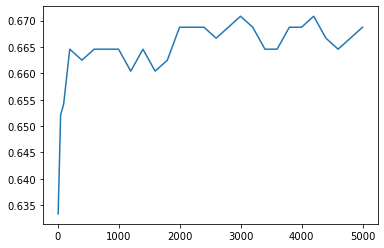

In [18]:
# cтроим график зависимости качества от числа деревьев
plt.plot(N, acc_scores)

### 4.Обучите реализации градиентного бустинга с параметрами по умолчанию из библиотек sklearn и xgboost. Сравните значение метрики accuracy по cross_val_score

In [19]:
### Ваш код ###
acc_sklearn = 0
acc_xgboost = 0

https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.cross_val_score.html

https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.GradientBoostingClassifier.html

https://xgboost.readthedocs.io/en/stable/python/python_api.html

In [20]:
# установим xgboost
# !pip3 install xgboost

In [21]:
# загружаем модели и оценки
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.model_selection import cross_val_score

In [22]:
%%time
# посчитаем accuracy GradientBoostingClassifier
sklearn = GradientBoostingClassifier(random_state = RANDOM_STATE).fit(X_train, y_train)
y_pred = sklearn.predict(X_test)
accuracy_sklearn = accuracy_score(y_test, y_pred)
print('Accuracy:', accuracy_sklearn)

Accuracy: 0.6333333333333333
CPU times: total: 1.62 s
Wall time: 1.61 s


In [23]:
%%time
# получим значения метрики accuracy по cross_val_score
acc_sklearn = cross_val_score(GradientBoostingClassifier(random_state = RANDOM_STATE), X, y, scoring='accuracy').mean()
print('Accuracy:', acc_sklearn)

Accuracy: 0.5653467868338558
CPU times: total: 9.33 s
Wall time: 9.35 s


https://stackoverflow.com/questions/71996617/invalid-classes-inferred-from-unique-values-of-y-expected-0-1-2-3-4-5-got

https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.LabelEncoder.html

In [24]:
# чтобы не было ошибки по XGB: "недопустимые классы, полученные из уникальных значений `y`"" загрузим кодировщик
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y_train_le = le.fit_transform(y_train)
y_test_le = le.transform(y_test)
y_le = le.transform(y)

In [25]:
%%time
# посчитаем accuracy XGBClassifier
xgboost = XGBClassifier(random_state = RANDOM_STATE).fit(X_train, y_train_le)
y_pred = xgboost.predict(X_test)
accuracy_xgboost = accuracy_score(y_test_le, y_pred)
print('Accuracy:', accuracy_xgboost)

Accuracy: 0.65625
CPU times: total: 2.55 s
Wall time: 377 ms


In [26]:
%%time
# получим значения метрики accuracy по cross_val_score
acc_xgboost = cross_val_score(XGBClassifier(random_state = RANDOM_STATE), X, y_le, scoring='accuracy').mean()
print('Accuracy:', acc_xgboost)

Accuracy: 0.5472335423197492
CPU times: total: 13 s
Wall time: 1.8 s


In [27]:
# Вывод: XGB работает быстрее, но результаты практически одинаковы

In [28]:
# фиксируем ответы
results.loc[3] = ['GradientBoostingClassifier', 'task4', acc_sklearn]
results.loc[4] = ['XGBClassifier', 'task4', acc_xgboost]

### 5.Подберите оптимальные параметры этих алгоритмов с помощью GridSearchCV(cv=3).
Параметры для оптимизации:

скорость обучения

количество деревьев

глубина деревьев

Сравните значение метрики accuracy. Выведите лучшие параметры алгоритмов.

In [29]:
### Ваш код ###
best_params_sklearn = {}
# print('Параметры лучшей модели sklearn:\n', best_params_sklearn)
best_params_xgboost = {}
# print('Параметры лучшей модели xgboost:\n', best_params_xgboost)
acc_sklearn_cv = 0
acc_xgboost_cv = 0

https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html

In [30]:
# загружаем инструмент
from sklearn.model_selection import GridSearchCV

In [31]:
%%time
# подбираем оптимальные параметры для алгоритма GradientBoostingClassifier с помощью GridSearchCV(cv=3)
params = {'learning_rate': [0.01, 0.1, 0.2, 0.3, 0.4, 0.5],
          'n_estimators': list(range(10, 201, 10)), 'max_depth': list(range(1, 11, 2))}
sklearn_cv = GridSearchCV(GradientBoostingClassifier(random_state = RANDOM_STATE), param_grid=params, scoring='accuracy',
                              cv=3, n_jobs=-1).fit(X_train, y_train)

best_params_sklearn = sklearn_cv.best_params_
acc_sklearn_cv = sklearn_cv.score(X_test, y_test)
print('Параметры лучшей модели sklearn:\n', best_params_sklearn)
print('acc_best:', acc_sklearn_cv)

Параметры лучшей модели sklearn:
 {'learning_rate': 0.2, 'max_depth': 5, 'n_estimators': 160}
acc_best: 0.6395833333333333
CPU times: total: 12.6 s
Wall time: 17min 47s


In [32]:
%%time
# подбираем оптимальные параметры для алгоритма XGBClassifier с помощью GridSearchCV(cv=3)
params = {'learning_rate': [0.01, 0.1, 0.2, 0.3, 0.4, 0.5],
          'n_estimators': list(range(10, 201, 10)), 'max_depth': list(range(1, 11, 2))}
sklearn_xgboost = GridSearchCV(XGBClassifier(random_state = RANDOM_STATE), param_grid=params, scoring='accuracy',
                              cv=3, n_jobs=-1).fit(X_train, y_train_le)

best_params_xgboost = sklearn_xgboost.best_params_
acc_xgboost_cv = sklearn_xgboost.score(X_test, y_test_le)
print('Параметры лучшей модели xgboost:\n', best_params_xgboost)
print('acc_best:', acc_xgboost_cv)

Параметры лучшей модели xgboost:
 {'learning_rate': 0.4, 'max_depth': 5, 'n_estimators': 30}
acc_best: 0.65625
CPU times: total: 8.56 s
Wall time: 3min 48s


In [33]:
# Вывод: У Xboost более высокий accuracy и намного быстрее.

In [34]:
# фиксируем ответы
results.loc[5] = ['GradientBoostingClassifier_CV', 'task5', acc_sklearn_cv]
results.loc[6] = ['XGBClassifier_CV', 'task5', acc_xgboost_cv]

### 6.Обучите реализации градиентного бустинга с параметрами по умолчанию из библиотек lightgbm и catboost. Сравните значение метрики accuracy по cross_val_score по всем четырем реализациям.

In [35]:
### Ваш код ###
acc_lightgbm = 0
acc_catboost = 0

In [36]:
# установим lightgbm
# !pip3 install lightgbm

In [37]:
# установим catboost
# !pip3 install catboost

https://lightgbm.readthedocs.io/en/v3.3.2/pythonapi/lightgbm.LGBMClassifier.html

https://catboost.ai/en/docs/concepts/python-reference_catboostclassifier

In [38]:
# загружаем инструменты
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier

In [39]:
%%time
# обучим реализации градиентного бустинга с параметрами по умолчанию из библиотек lightgbm
acc_lightgbm = cross_val_score(LGBMClassifier(random_state = RANDOM_STATE), X, y, scoring="accuracy").mean()
print('acc_lightgbm:', acc_lightgbm)

acc_lightgbm: 0.5572472570532915
CPU times: total: 14.2 s
Wall time: 1.92 s


In [40]:
%%time
# обучим реализации градиентного бустинга с параметрами по умолчанию из библиотек catboost
acc_catboost = cross_val_score(CatBoostClassifier(random_state = RANDOM_STATE, verbose=False), X, y, scoring="accuracy").mean()
print('acc_catboost:', acc_catboost)

acc_catboost: 0.5516105015673981
CPU times: total: 2min 51s
Wall time: 37.1 s


In [41]:
%%time
# получим значения метрики accuracy по cross_val_score
acc_sklearn = cross_val_score(GradientBoostingClassifier(random_state = RANDOM_STATE), X, y, scoring='accuracy').mean()
print('acc_sklearn:', acc_sklearn)

acc_sklearn: 0.5653467868338558
CPU times: total: 9.83 s
Wall time: 9.89 s


In [42]:
%%time
# получим значения метрики accuracy по cross_val_score
acc_xgboost = cross_val_score(XGBClassifier(random_state = RANDOM_STATE), X, y_le, scoring='accuracy').mean()
print('acc_xgboost:', acc_xgboost)

acc_xgboost: 0.5472335423197492
CPU times: total: 13 s
Wall time: 1.81 s


In [43]:
# Вывод: из 4-х моделей у GradientBoostingClassifier более высокий accuracy

In [44]:
# фиксируем ответы
results.loc[7] = ['LGBMClassifier', 'task6', acc_lightgbm]
results.loc[8] = ['CatBoostClassifier', 'task6', acc_catboost]

### 7.Подберите оптимальные параметры для алгоритмов градиентного бустинга из библиотек lightgbm и catboost с теми же условиями.
Сравните значение метрики accuracy. Выведите лучшие параметры алгоритмов.

In [45]:
### Ваш код ###
best_params_lightgbm = {}
# print('Параметры лучшей модели lightgbm:\n', best_params_lightgbm)
best_params_catboost = {}
# print('Параметры лучшей модели catboost:\n', best_params_catboost)
acc_lightgbm_cv = 0
acc_catboost_cv = 0

In [46]:
%%time
# подбираем оптимальные параметры для алгоритма LGBMClassifier с помощью GridSearchCV(cv=3)
params = {'learning_rate': [0.01, 0.1, 0.2, 0.3, 0.4, 0.5],
          'n_estimators': list(range(10, 201, 10)), 'max_depth': list(range(1, 11, 2))}
lightgbm_cv = GridSearchCV(LGBMClassifier(random_state = RANDOM_STATE), param_grid=params, scoring='accuracy',
                              cv=3, n_jobs=-1).fit(X_train, y_train)

best_params_lightgbm = lightgbm_cv.best_params_
acc_lightgbm_cv = lightgbm_cv.score(X_test, y_test)
print('Параметры лучшей модели lightgbm:\n', best_params_lightgbm)
print('acc_best:', acc_lightgbm_cv)

Параметры лучшей модели lightgbm:
 {'learning_rate': 0.2, 'max_depth': 7, 'n_estimators': 190}
acc_best: 0.6708333333333333
CPU times: total: 14.2 s
Wall time: 1min 42s


In [47]:
%%time
# подбираем оптимальные параметры для алгоритма CatBoostClassifier с помощью GridSearchCV(cv=3)
params = {'learning_rate': [0.01, 0.1, 0.2, 0.3, 0.4, 0.5],
          'n_estimators': list(range(10, 201, 10)), 'max_depth': list(range(1, 11, 2))}
catboost_cv = GridSearchCV(CatBoostClassifier(random_state = RANDOM_STATE, verbose=False), param_grid=params,
                           scoring='accuracy',cv=3, n_jobs=-1).fit(X_train, y_train)

best_params_catboost = catboost_cv.best_params_
acc_catboost_cv = catboost_cv.score(X_test, y_test)
print('Параметры лучшей модели catboost:\n', best_params_catboost)
print('acc_best:', acc_catboost_cv)

Параметры лучшей модели catboost:
 {'learning_rate': 0.5, 'max_depth': 7, 'n_estimators': 170}
acc_best: 0.6666666666666666
CPU times: total: 22.4 s
Wall time: 30min 23s


In [48]:
# Вывод: Лучший результат при подборе параметров показал LGBMClassifier

In [49]:
# фиксируем ответы
results.loc[9] = ['LGBMClassifier_CV', 'task7', acc_lightgbm_cv]
results.loc[10] = ['CatBoostClassifier_CV', 'task7', acc_catboost_cv]

### 8.Подберите оптимальные параметры алгоритма из библиотеки xgbost с помощью [optuna](https://github.com/optuna/optuna) . Параметры для оптимизации:

скорость обучения

количество деревьев

глубина деревьев

Сравните результат с поиском по сетке из sklearn. Выведите лучшие параметры алгоритма, найденные даным способом.

https://optuna.readthedocs.io/_/downloads/en/v2.6.0/pdf/

https://optuna.org/

In [50]:
### Ваш код ###
best_params_xgboost_optuna = {}
# print('Параметры лучшей модели xgboost:\n', best_params_xgboost_optuna)
acc_xgboost_optuna = 0

In [51]:
# установим optuna
# !pip3 install optuna

In [52]:
# загрузим инструмент
import optuna
optuna.logging.set_verbosity(optuna.logging.WARNING)

In [53]:
%%time
# подбираем оптимальные параметры алгоритма из библиотеки xgbost с помощью optuna
def objective(trial):
       
        params = {'learning_rate': trial.suggest_float('learning_rate', 0.01, 0.05),
                  'n_estimators': trial.suggest_int('n_estimators', 10, 200),
                  'max_depth': trial.suggest_int('max_depth', 1, 10)}
                     
        acc_xgboost = cross_val_score(XGBClassifier(**params, random_state = RANDOM_STATE), X, y_le, scoring='accuracy').mean()

        return acc_xgboost
    
        
study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=100)

best_params_xgboost_optuna = study.best_params
acc_xgboost_optuna = study.best_value

print('Параметры лучшей модели xgboost:\n', best_params_xgboost_optuna)
print('acc_best:', acc_xgboost_optuna)

Параметры лучшей модели xgboost:
 {'learning_rate': 0.03201049839370856, 'n_estimators': 118, 'max_depth': 5}
acc_best: 0.5966222570532915
CPU times: total: 30min 33s
Wall time: 4min 21s


In [54]:
# фиксируем ответы
results.loc[11] = ['XGBClassifier_optuna', 'task8', acc_xgboost_optuna]

### 9.Выведите качество по метрике accuracy стэкинга (StackingClassifier) 4-х алгоритмов с базовыми параметрами градиентного бустинга.

In [55]:
### Ваш код ###
acc_stacking_default = 0

https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.StackingClassifier.html

In [56]:
# загружаем инструмент
from sklearn.ensemble import StackingClassifier

In [58]:
%%time
# выведим accuracy стэкинга с базовыми параметрами
estimators = [('GBC', GradientBoostingClassifier(random_state = RANDOM_STATE)),
              ('XGBC', XGBClassifier(random_state = RANDOM_STATE)), ('LGBMC', LGBMClassifier(random_state = RANDOM_STATE)),
               ('CBC', CatBoostClassifier(random_state = RANDOM_STATE, verbose=False))]
SC = StackingClassifier(estimators)
acc_stacking_default = cross_val_score(SC, X, y, scoring='accuracy').mean()
print('Accuracy:', acc_stacking_default)

Accuracy: 0.5947531347962383
CPU times: total: 22min 1s
Wall time: 5min 8s


In [59]:
# фиксируем ответы
results.loc[12] = ['Stacking default', 'task9', acc_stacking_default]

### 10.Выведите качество по метрике accuracy стэкинга 4-х алгоритмов с оптимальными параметрами градиентного бустинга. Сравните результаты с предыдущим шагом и напишите какой вывод можно из этого сделать.

In [60]:
### Ваш код ###
acc_stacking = 0

In [63]:
%%time
# выведим accuracy стэкинга с оптимальными параметрами
best_estimators=[('GBC', GradientBoostingClassifier(**best_params_sklearn, random_state = RANDOM_STATE)),
                 ('XGBC', XGBClassifier(**best_params_xgboost, random_state = RANDOM_STATE)),
                 ('LGBMC', LGBMClassifier(**best_params_lightgbm, random_state = RANDOM_STATE)),
                 ('CBC', CatBoostClassifier(**best_params_catboost, random_state = RANDOM_STATE, verbose=False))]
SC = StackingClassifier(best_estimators)
acc_stacking = cross_val_score(SC, X, y, scoring='accuracy').mean()
print('Accuracy:', acc_stacking)

Accuracy: 0.5778585423197492
CPU times: total: 8min 59s
Wall time: 3min 24s


In [64]:
# Вывод: Cтэкинг алгоритмов с базовыми параметрами отработал лучше

In [65]:
# фиксируем ответы
results.loc[13] = ['Stacking', 'task10', acc_stacking]

### Результат:

In [66]:
results

,model,task,accuracy
0,DecisionTreeClassifier,task2,0.572917
1,BaggingClassifier,task2,0.641667
2,RandomForestClassifier,task2,0.654167
3,GradientBoostingClassifier,task4,0.565347
4,XGBClassifier,task4,0.547234
5,GradientBoostingClassifier_CV,task5,0.639583
6,XGBClassifier_CV,task5,0.656250
7,LGBMClassifier,task6,0.557247
8,CatBoostClassifier,task6,0.551611
9,LGBMClassifier_CV,task7,0.670833
